## material

### youtube

[Link](https://www.youtube.com/watch?v=HGYYEUSm-0Q) to the video of the presentation of the paper at the conference NeurIPS.

### paperswithcode

[Link](https://paperswithcode.com/paper/improved-techniques-for-training-gans) to the paper on [paperswithcode.com](https://paperswithcode.com).

### Maxime Vandegar
[Link](https://github.com/MaximeVandegar/Papers-in-100-Lines-of-Code/tree/main/Improved_Techniques_for_Training_GANs) to the GitHub repository.

In [1]:
# standard libraries
import numpy as np
from matplotlib import pyplot as plt
# progress bar
from tqdm import tqdm
# pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets

# mnist dataset
train = datasets.MNIST(root = "./data", train = True, download = True, transform = None)
test = datasets.MNIST(root = "./data", train = False, download = True, transform = None)
X_train = np.stack([np.array(train[i][0]) for i in range(len(train))], axis = 0)
y_train = np.stack([np.array(train[i][1]) for i in range(len(train))], axis = 0)
X_test = np.stack([np.array(test[i][0]) for i in range(len(test))], axis = 0)
y_test = np.stack([np.array(test[i][1]) for i in range(len(test))], axis = 0)

100%|██████████| 50000/50000 [25:29<00:00, 32.68it/s]


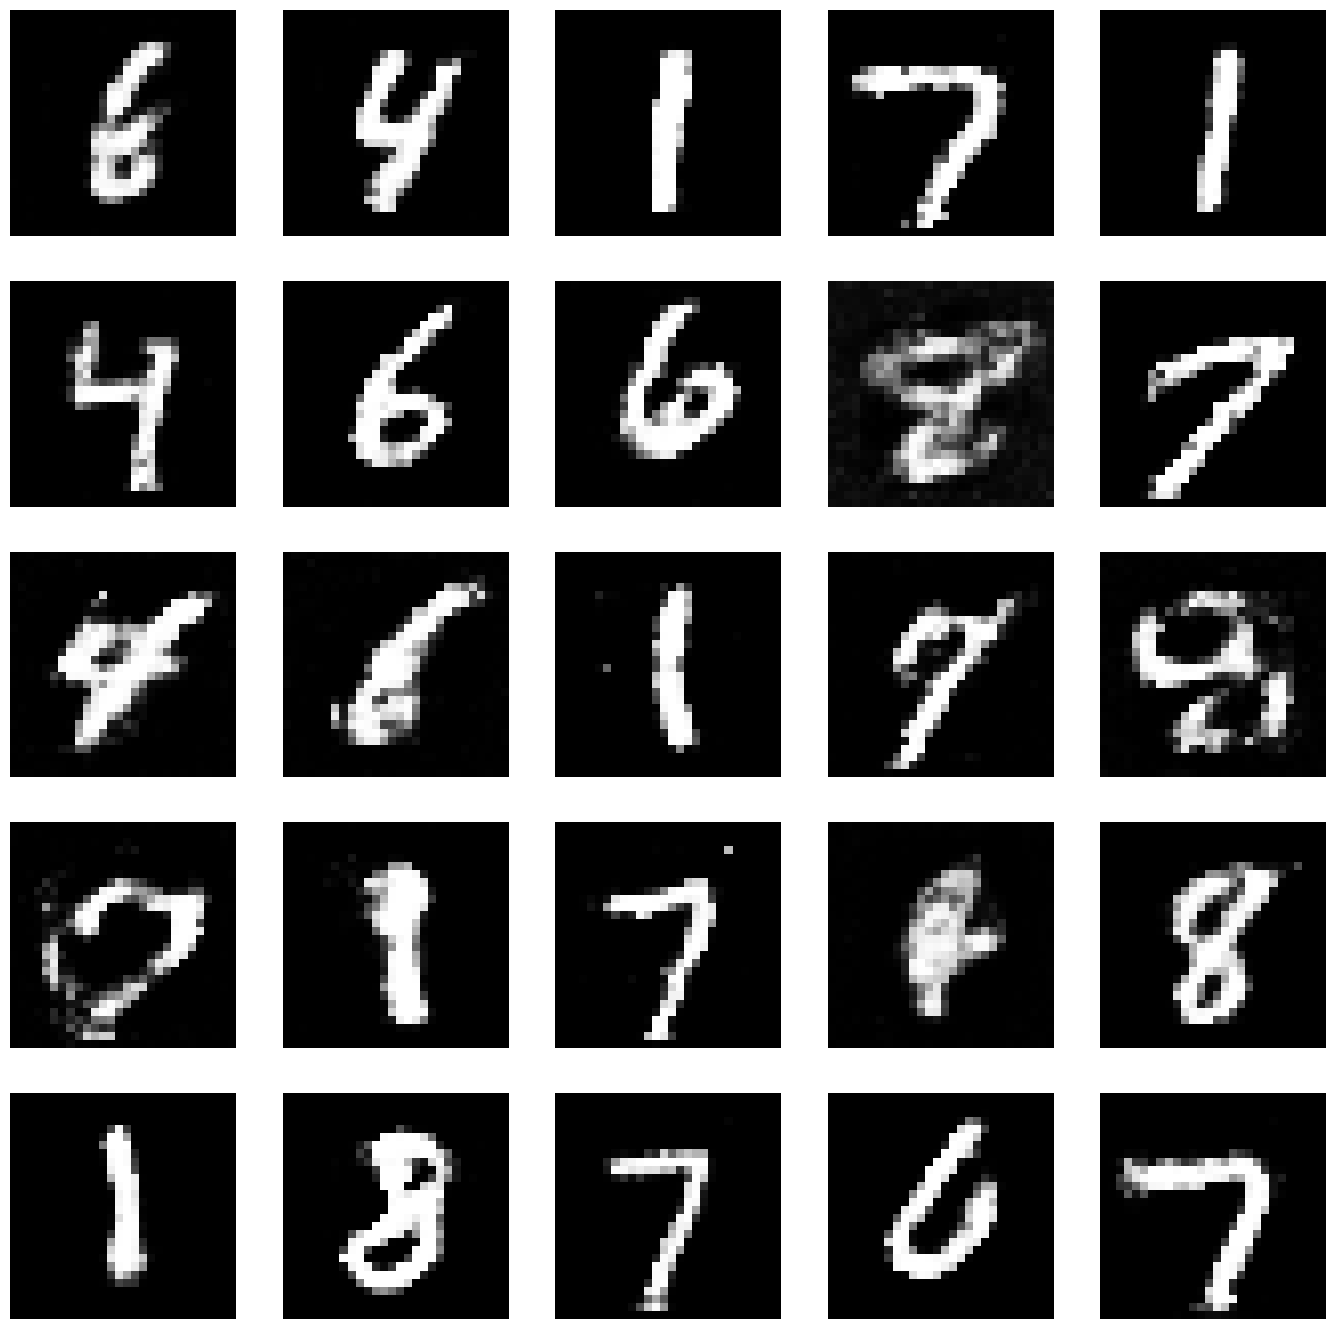

In [ ]:
# load (and normalize) mnist dataset
X_train = (np.float32(X_train) - 127.5) / 127.5


def get_minibatch(batch_size):
	indices = torch.randperm(X_train.shape[0])[:batch_size]
	return torch.tensor(X_train[indices], dtype=torch.float).reshape(batch_size, -1)

def sample_noise(size, dim = 100):
	out = torch.empty(size, dim)
	mean = torch.zeros(size, dim)
	std = torch.ones(dim)
	torch.normal(mean, std, out=out)
	return out


class Generator(nn.Module):

	def __init__(self, input_dim=100, hidden_dim=1200, output_dim=28 * 28):
		super(Generator, self).__init__()

		self.network = nn.Sequential(
			nn.Linear(input_dim, hidden_dim),
			nn.ReLU(),
			nn.Linear(hidden_dim, hidden_dim),
			nn.ReLU(),
			nn.Linear(hidden_dim, output_dim),
			nn.Tanh(), )

	def forward(self, noise):
		return self.network(noise)


class Discriminator(nn.Module):

	def __init__(self, input_dim=28 * 28, hidden_dim=240, output_dim=1):
		super(Discriminator, self).__init__()

		self.network = nn.Sequential(
			nn.Linear(input_dim, hidden_dim),
			nn.LeakyReLU(negative_slope=0.2),
			nn.Linear(hidden_dim, hidden_dim),
			nn.LeakyReLU(negative_slope=0.2),
			nn.Linear(hidden_dim, output_dim),
			nn.Sigmoid(), )

	def forward(self, x):
		return self.network(x)


def train(generator, discriminator, generator_optimizer, discriminator_optimizer, nb_epochs, k=1, batch_size=100):
	training_loss = {'generative': [], 'discriminator': []}
	for epoch in tqdm(range(nb_epochs)):

		# Train the disciminator
		for _ in range(k):
			# Sample a minibatch of m noise samples
			z = sample_noise(batch_size).to(device)
			# Sample a minibatch of m examples from the data generating distribution
			x = get_minibatch(batch_size).to(device)

			# Update the discriminator by ascending its stochastic gradient
			f_loss = torch.nn.BCELoss()(discriminator(generator(z)).reshape(batch_size),
										torch.zeros(batch_size, device=device))
			r_loss = torch.nn.BCELoss()(discriminator(x).reshape(batch_size), torch.ones(batch_size, device=device))
			loss = (r_loss + f_loss) / 2
			discriminator_optimizer.zero_grad()
			loss.backward()
			discriminator_optimizer.step()
			training_loss['discriminator'].append(loss.item())

		# Train the generator

		# Sample a minibatch of m noise samples
		z = sample_noise(batch_size).to(device)
		# Update the generator by descending its stochastic gradient
		loss = torch.nn.BCELoss()(discriminator(generator(z)).reshape(batch_size),
								torch.ones(batch_size, device=device))
		generator_optimizer.zero_grad()
		loss.backward()
		generator_optimizer.step()
		training_loss['generative'].append(loss.item())

	return training_loss


if __name__ == "__main__":
	device = 'cuda:0'

	discriminator = Discriminator().to(device)
	generator = Generator().to(device)

	optimizer_d = optim.SGD(discriminator.parameters(), lr=0.1, momentum=0.5)
	optimizer_g = optim.SGD(generator.parameters(), lr=0.1, momentum=0.5)

	loss = train(generator, discriminator, optimizer_g, optimizer_d, 50000, batch_size=100)

	# Sample and plot images from the trained generator
	NB_IMAGES = 25
	z = sample_noise(NB_IMAGES).to(device)
	x = generator(z)
	plt.figure(figsize=(17, 17))
	for i in range(NB_IMAGES):
		plt.subplot(5, 5, 1 + i)
		plt.axis('off')
		plt.imshow(x[i].data.cpu().numpy().reshape(28, 28), cmap='gray')
	plt.savefig("./data/images/regenerated_MNIST_data.png")
	plt.show()

### Erik Lindernoren
[Link](https://github.com/eriklindernoren/PyTorch-GAN/blob/master/implementations/gan/gan.py) to the GitHub repository.

### Varuna Jayasiri
[Link](https://nn.labml.ai/gan/original/index.html) to the commented paper with code.